In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections


In [2]:
preDouble = "\\\\iobsdc01\\SharedDocs\\SEER_MEDICARE\\SEER_MEDICARE_STAGING"
new = os.chdir(preDouble)
print(preDouble)

\\iobsdc01\SharedDocs\SEER_MEDICARE\SEER_MEDICARE_STAGING


In [58]:
df = pd.read_pickle('dfpedsfFirsts.pickle')

In [59]:
#mask = (df['cstum1'] != "Unknown; size not stated; not stated in patient record") & \
#(df['cstum1'] != "Microscopic focus or foci only; no size of focus is given") & \
#(df['cstum1'] != "989 millimeters or larger") & \
#(df['cstum1'] != "Not applicable") & \
#(df['cstum1'] != "Unknown age") & \
#(df['cstum1'] != "Described as less than 1 cm") & \
#(df['cstum1'] != "Described as less than 2 cm") & \
#(df['cstum1'] != "Described as less than 3 cm") & \
#(df['cstum1'] != 'Indicates no mass or no tumor found; for example, when a tumor of a stated primary site is not found, but the tumor has metastasized') & \
#(df['cstum1'] != "Described as less than 4 cm") & \
#(df['cstum1'] != "Described as less than 5 cm") & \
#(df['cstum1'] != "Not applicable") & \
#(df['cstum1'] != 'Not applicable') & \
#(df['cstum1'] != 996) & \
#(df['cstum1'] != 997) & \
#(df['cstum1'] != 998) & \
#(df['srvm1'] != 9999)

mask = (df['srvm1'] != 9999)
dfall = df[mask]

In [60]:
geomask = (dfall['elevation_1'] != dfall['FIPScombo_1']) 

dfall = dfall[geomask].copy()

In [61]:
dfall['elevation_1'].replace('99999',np.nan,inplace=True)
dfall['elevation_2'].replace('99999',np.nan,inplace=True)
dfall['elevation_3'].replace('99999',np.nan,inplace=True)

dfall['lat_1'].replace('99999',np.nan,inplace=True)
dfall['lat_2'].replace('99999',np.nan,inplace=True)
dfall['lat_3'].replace('99999',np.nan,inplace=True)

dfall['lng_1'].replace('99999',np.nan,inplace=True)
dfall['lng_2'].replace('99999',np.nan,inplace=True)
dfall['lng_3'].replace('99999',np.nan,inplace=True)

dfall['elevation_1'] = dfall['elevation_1'].astype('float')
dfall['elevation_2'] = dfall['elevation_2'].astype('float')
dfall['elevation_3'] = dfall['elevation_3'].astype('float')

dfall['lat_1'] = dfall['lat_1'].astype('float')
dfall['lat_2'] = dfall['lat_2'].astype('float')
dfall['lat_3'] = dfall['lat_3'].astype('float')

dfall['lng_1'] = dfall['lng_1'].astype('float')
dfall['lng_2'] = dfall['lng_2'].astype('float')
dfall['lng_3'] = dfall['lng_3'].astype('float')

In [62]:
import pickle
fileObject = open('patient_ids_from_outsaf.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
treatmentindices_outsaf = list(set.union(*b))

In [63]:
import pickle
fileObject = open('patient_ids_from_nch.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
treatmentindices_nch = list(set.union(*b))

In [64]:
bigtreatmentindices = list(set(treatmentindices_nch+treatmentindices_outsaf))

dfall.set_index('patient_id', inplace=True,drop=False)

allindices = dfall.index

In [65]:
bigtreatmentset = set(bigtreatmentindices)
allset = set(allindices)


alltreatmentindices = list(allset.intersection(bigtreatmentset))

treatmentindices = alltreatmentindices
len(treatmentindices)

1584

In [66]:
non_rad = dfall.rad1.str.contains('None',case=False,na=False)
refused_rad = dfall.rad1.str.contains('refused',case=False,na=False)
unknown_rad = dfall.rad1.str.contains('unknown',case=False,na=False)

In [67]:
dfall.patient_id.isin(treatmentindices).sum()


1584

In [68]:
non_rad1 = dfall.rad1.str.contains('None',case=False,na=False)
refused_rad1 = dfall.rad1.str.contains('refused',case=False,na=False)
unknown_rad1 = dfall.rad1.str.contains('unknown',case=False,na=False)

In [69]:
one = ~non_rad1 & ~refused_rad1 & ~unknown_rad1

had_rad = one

In [70]:
had_rad.sum()

180121

In [71]:
df.shape

(509984, 496)

In [72]:
had_rad.index

Index(['0205455031', '0208413011', '0208497001', '0212443031', '0212448031',
       '0222400091', '0224443041', '0225449061', '0226416051', '0226460011',
       ...
       '8899098460', '8899099239', '8899099303', '8899099324', '8899099349',
       '8899099351', '8899099382', '8899099393', '8899099420', '8899099460'],
      dtype='object', name='patient_id', length=502438)

In [73]:
had_rad.sum()

180121

In [74]:
dfall.shape

(502438, 496)

We should only be looking at those 72,002 patients that received some form of radiation.

In [75]:
dfsmall = dfall[had_rad].copy()

In [76]:
dfsmall.shape

(180121, 496)

In [77]:
smalltreatmentindices = dfsmall[dfsmall.patient_id.isin(treatmentindices)].index
smallcontrolindices = dfsmall[~dfsmall.patient_id.isin(treatmentindices)].index

In [78]:
smallcontrolindices.shape

(178931,)

In [79]:
smalltreatmentindices.shape

(1190,)

In [80]:
dfalltreatment = dfsmall.loc[smalltreatmentindices].copy()
dfalltreatment.shape


(1190, 496)

In [82]:
dfallcontrol = dfsmall.loc[smallcontrolindices].copy()
dfallcontrol.shape


(178931, 496)

In [83]:
dfalltreatment[['stat_rec','srvm1']].head()

stat_rec  srvm1
patient_id                
4416199024    Alive     49
4498154002    Alive     82
8832054323    Alive     65
8833022382     Dead     15
8839000383    Alive     54

## So we are going to match patients in the treatment group with their nearest neighbors in the control group

In order to find the nearest neighbors in the high-dimensional feature space, we need to first do some preprocessing of the data. The first step is to "one-hot-encode" the categorical features.

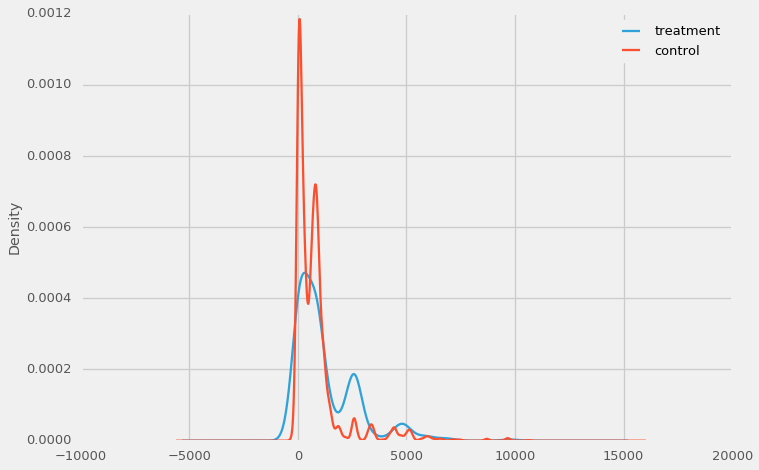

In [85]:
ax = dfalltreatment.elevation_1.plot(kind='kde',label='treatment')
dfallcontrol.elevation_1.plot(kind='kde',label='control')
plt.legend();


In [86]:
catcols = ['m_sex','marst1','srace','nhiade','grade1',
           'site1','lat1',
          'histrec1',
           'modx1','stat_rec']


In [87]:
goodcols = ['m_sex','marst1', 'srace','nhiade',
           'grade1','site1',
           'lat1','histrec1',
           'modx1','stat_rec','birthyr',
           'agedx1',
           'yrdx1','elevation_1',
           'lat_1']

In [88]:
dfpop = pd.concat([dfallcontrol, dfalltreatment])

## Before matching, let's look at the Kaplan-Meier curves

In [89]:
resgoodcontrol = pd.concat([pd.get_dummies(dfallcontrol[col],prefix=col) for col in catcols], axis=1)

resgoodtreatment = pd.concat([pd.get_dummies(dfalltreatment[col],prefix=col) for col in catcols], axis=1)

resgoodpop = pd.concat([pd.get_dummies(dfpop[col],prefix=col) for col in catcols], axis=1)


In [90]:
print(goodcols)

['m_sex', 'marst1', 'srace', 'nhiade', 'grade1', 'site1', 'lat1', 'histrec1', 'modx1', 'stat_rec', 'birthyr', 'agedx1', 'yrdx1', 'elevation_1', 'lat_1']


In [91]:
resgoodcontrol['birthyr'] = dfallcontrol['birthyr']
resgoodcontrol['agedx1'] = dfallcontrol['agedx1']

resgoodcontrol['yrdx1'] = dfallcontrol['yrdx1']

resgoodcontrol['lat_1'] = dfallcontrol['lat_1']

resgoodcontrol['lng_1'] = dfallcontrol['lng_1']

resgoodcontrol['srvm1'] = dfallcontrol['srvm1']

In [92]:
resgoodtreatment['birthyr'] = dfalltreatment['birthyr']
resgoodtreatment['agedx1'] = dfalltreatment['agedx1']

resgoodtreatment['yrdx1'] = dfalltreatment['yrdx1']



resgoodtreatment['lat_1'] = dfalltreatment['lat_1']

resgoodtreatment['lng_1'] = dfalltreatment['lng_1']

resgoodtreatment['srvm1'] = dfalltreatment['srvm1']

In [93]:
resgoodpop['birthyr'] = dfpop['birthyr']
resgoodpop['agedx1'] = dfpop['agedx1']

resgoodpop['yrdx1'] = dfpop['yrdx1']




resgoodpop['lat_1'] = dfpop['lat_1']

resgoodpop['lng_1'] = dfpop['lng_1']

resgoodpop['srvm1'] = dfpop['srvm1']

## After performing the matching between the control and treatment groups, we can see how the Kaplan-Meier curves differ

Below is how it looks **before** matching patients in the control and treatment groups together in pairs.

In [94]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodpop.loc[smallcontrolindices]["srvm1"]
Econtrol = resgoodpop.loc[smallcontrolindices]["stat_rec_Dead"]

Ttreatment = resgoodpop.loc[smalltreatmentindices]["srvm1"]
Etreatment = resgoodpop.loc[smalltreatmentindices]["stat_rec_Dead"]

Tpop = resgoodpop["srvm1"]
Epop = resgoodpop["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 1190 observations, 1042 censored>

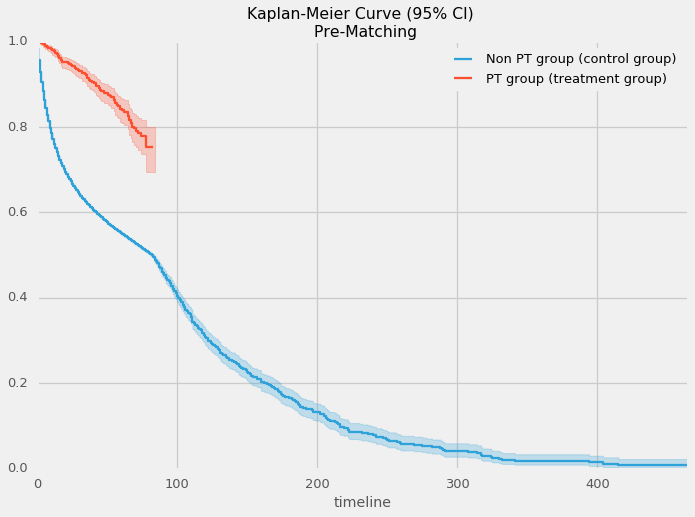

In [95]:
ax = kmfcontrol.plot()
kmftreatment.plot(ax=ax)
plt.title("Kaplan-Meier Curve (95% CI) \n Pre-Matching");


## Clearly, there is a difference between these survival curves

But one can argue that we are not really comparing apples to apples when we calculate these two survival curves. To answer this objection, we need to perform patient matching, so that we are really comparing apples to apples and that any marked difference in the survival curves can be confidently attributed to the difference in treatment modalites.

In [96]:
resgoodpop['birthyr'] = resgoodpop['birthyr'].astype('int')
resgoodpop['agedx1'] = resgoodpop['agedx1'].astype('float')



resgoodpop['lat_1'] = resgoodpop['lat_1'].astype('float')



resgoodpop['lng_1'] = resgoodpop['lng_1'].astype('float')


resgoodpop['srvm1'] = resgoodpop['srvm1'].astype('float')


newcolumns = list(resgoodpop.columns)

newcolumns.remove('srvm1')
newcolumns.remove('stat_rec_Alive')
newcolumns.remove('stat_rec_Dead')
newcolumns.remove('m_sex_Male')

resgreatpop = resgoodpop[newcolumns].copy()

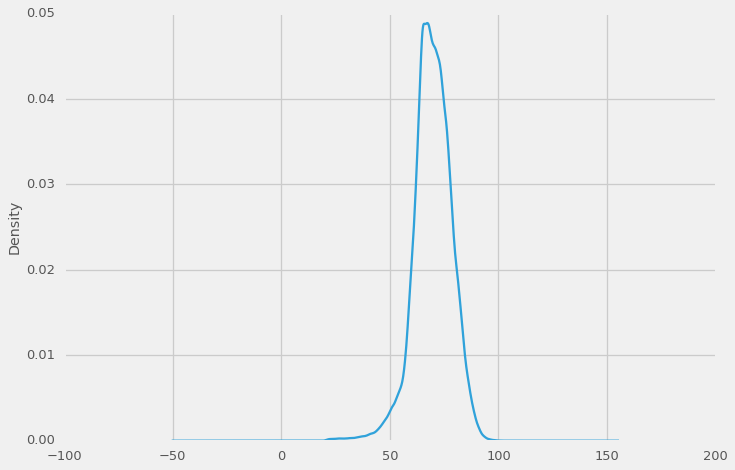

In [97]:

resgoodpop['agedx1'].plot(kind='kde')


In [98]:
resgreatpop['patient_id'] = resgreatpop.index
leaguefilter = (resgreatpop['patient_id'].loc[smalltreatmentindices])
resgreatpop['League'] = resgreatpop['patient_id'].isin(smalltreatmentindices).astype('int')
del resgreatpop['patient_id']
dftree = resgreatpop.copy()

y = dftree['League'].copy()
del dftree['League']

In [99]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plot
#import psycopg2
import random
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cross_validation import StratifiedShuffleSplit
import pylab as plot
from pandas import DataFrame, Series
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn import feature_extraction
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.neural_network import MultilayerPerceptronClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.svm import SVC
import pylab as pl
from sklearn.decomposition import RandomizedPCA
from itertools import cycle
from sklearn.cross_validation import ShuffleSplit
from scipy.stats import sem
from pprint import pprint
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import lag_plot

In [100]:
resgreatpop.columns

Index(['m_sex_Female', 'marst1_Divorced',
       'marst1_Married (including common law)', 'marst1_Separated',
       'marst1_Single (never married)', 'marst1_Unknown',
       'marst1_Unmarried or domesntic partner (same sex or opposite sex or unregistered)',
       'marst1_Widowed',
       'srace_American Indian, Aleutian, Alaska Native or Eskimo (includes all indigenous populations of the Western hemisphere)',
       'srace_Asian Indian',
       ...
       'modx1_May', 'modx1_Nov', 'modx1_Oct', 'modx1_Sep', 'birthyr', 'agedx1',
       'yrdx1', 'lat_1', 'lng_1', 'League'],
      dtype='object', length=186)

In [101]:
dftree.columns

Index(['m_sex_Female', 'marst1_Divorced',
       'marst1_Married (including common law)', 'marst1_Separated',
       'marst1_Single (never married)', 'marst1_Unknown',
       'marst1_Unmarried or domesntic partner (same sex or opposite sex or unregistered)',
       'marst1_Widowed',
       'srace_American Indian, Aleutian, Alaska Native or Eskimo (includes all indigenous populations of the Western hemisphere)',
       'srace_Asian Indian',
       ...
       'modx1_Mar', 'modx1_May', 'modx1_Nov', 'modx1_Oct', 'modx1_Sep',
       'birthyr', 'agedx1', 'yrdx1', 'lat_1', 'lng_1'],
      dtype='object', length=185)

In [102]:
dftree.shape

(180121, 185)

In [103]:
xTrain = dftree.values
xTrain = StandardScaler().fit_transform(xTrain)
from sklearn.neighbors import KDTree
print(xTrain)

[[-0.51772391 -0.31667753  0.77639242 ...,  0.90271036  0.82845896
   1.29304837]
 [-0.51772391 -0.31667753  0.77639242 ...,  0.90271036  0.82845896
   1.29304837]
 [-0.51772391 -0.31667753  0.77639242 ...,  1.44723453  0.81365246
   1.26511913]
 ..., 
 [ 1.93153143 -0.31667753 -1.28800845 ...,  0.3581862  -0.97425408
  -0.89345762]
 [-0.51772391 -0.31667753  0.77639242 ...,  0.90271036 -0.7151684
  -0.90504272]
 [ 1.93153143 -0.31667753  0.77639242 ...,  0.3581862  -0.7151684
  -0.90504272]]


In [104]:
from sklearn.neighbors import KDTree
kdt = KDTree(xTrain, leaf_size=30)

## Here is a video explaining the construction of a KDTree

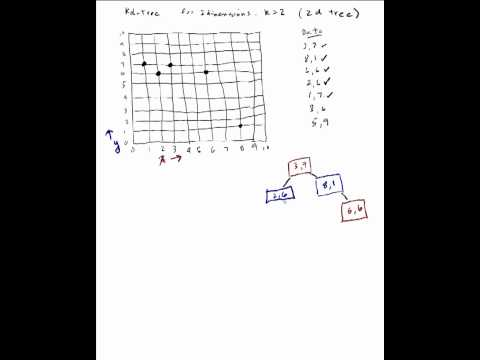

In [105]:

from IPython.display import YouTubeVideo
YouTubeVideo('LdaL-l2S76c')

In [106]:
dftreeleague = dftree.copy()
dftreeleague['League'] = y

def get_league(x):
    return dftreeleague['League'].loc[x]

dist4, ind4 = kdt.query(xTrain, k=4, return_distance=True)


## Finding the distance to all of the 4 nearest neighbors only took about 50 minutes

In [107]:
dftreeleague['nearest'] = pd.Series(ind4[:,0],index=dftreeleague.index)
dftreeleague['neighbor_1'] = pd.Series(ind4[:,1],index=dftreeleague.index)
dftreeleague['neighbor_2'] = pd.Series(ind4[:,2],index=dftreeleague.index)
dftreeleague['neighbor_3'] = pd.Series(ind4[:,3],index=dftreeleague.index)
dftreeleague['distance_1'] = pd.Series(dist4[:,1],index=dftreeleague.index)
dftreeleague['distance_2'] = pd.Series(dist4[:,2],index=dftreeleague.index)
dftreeleague['distance_3'] = pd.Series(dist4[:,3],index=dftreeleague.index)

dfmap = {v: dftreeleague.index[v] for v in range(dftreeleague.shape[0])}

In [108]:
def get_pubcsnum(x,transformationdict = dfmap):
    return dfmap[x]


dftreeleague['neighbor_1'] = dftreeleague['neighbor_1'].apply(get_pubcsnum)
dftreeleague['neighbor_2'] = dftreeleague['neighbor_2'].apply(get_pubcsnum)
dftreeleague['neighbor_3'] = dftreeleague['neighbor_3'].apply(get_pubcsnum)

def get_league(x):
    return dftreeleague['League'].loc[x]

dftreeleague['neighbor_1_League'] = dftreeleague['neighbor_1'].apply(get_league)
dftreeleague['neighbor_2_League'] = dftreeleague['neighbor_2'].apply(get_league)
dftreeleague['neighbor_3_League'] = dftreeleague['neighbor_3'].apply(get_league)

neighbor_1_match = (dftreeleague['neighbor_1_League'] == 0)

dist1filter = (dftreeleague['distance_1'] <= 2)
dist2filter = (dftreeleague['distance_2'] <= 2)
dist3filter = (dftreeleague['distance_3'] <= 2)

one = dftreeleague[['neighbor_1','distance_1',
                  'neighbor_1_League'
]][(dftreeleague['neighbor_1_League'] != dftreeleague['League']) & (neighbor_1_match) & (dist1filter)].copy()


neighbor_2_match = (dftreeleague['neighbor_2_League'] == 0)

two = dftreeleague[['neighbor_2','distance_2',
                  'neighbor_2_League'
]][(dftreeleague['neighbor_2_League'] != dftreeleague['League']) & (neighbor_2_match) & (dist2filter)].copy()


neighbor_3_match = (dftreeleague['neighbor_3_League'] == 0)

three = dftreeleague[['neighbor_3','distance_3',
                  'neighbor_3_League'
]][(dftreeleague['neighbor_3_League'] != dftreeleague['League']) & (neighbor_3_match) & (dist3filter) ].copy()

one.head(10)

neighbor_1  distance_1  neighbor_1_League
patient_id                                           
8833022382  2238184000    1.978349                  0
8865019342  8882020381    0.568537                  0
2281022515  4260019093    1.103319                  0
4315229060  8792067479    1.450020                  0
4349078094  8748022560    0.758760                  0
4473112043  4408106073    0.602832                  0
8804056423  8825006483    0.122523                  0
8803079482  2269141070    1.894771                  0
8807062300  8802047353    1.666034                  0
8841000365  8830031334    1.299845                  0

In [109]:
onedict = one['neighbor_1'].to_dict()
twodict = two['neighbor_2'].to_dict()
threedict = three['neighbor_3'].to_dict()

from collections import defaultdict

dd = defaultdict(list)

for d in (onedict, twodict, threedict):
    for key, value in d.items():
        dd[key].append(value)
        
        

goodtreatmentteams = list(dd.keys())

goodcontrolteams = list(dd.values())
matches = list(set([item for sublist in goodcontrolteams for item in sublist]))

controlindices = matches
treatmentindices = goodtreatmentteams
print(len(treatmentindices))
print(len(controlindices))

1068
2734


## Need to do a one-to-one matching (where each member of the treatment group is matched to one and only one member of the control group, and vice-versa)

In [110]:
d_one_to_one = {k: dd[k][0] for k in dd}
d_t_c = {}

for key, value in d_one_to_one.items():
    if value not in d_t_c.values():
        d_t_c[key] = value
        
treatmentindices = list(d_t_c.keys())
controlindices = list(d_t_c.values())    

In [111]:
treatmentindices = list(d_t_c.keys())
controlindices = list(d_t_c.values())

print(len(controlindices), len(treatmentindices))

1031 1031


So we have 1031 treatment patients matched very closely to 1031 control patients. 

## <font color='steelblue'>Now here is the Kaplan-Meier plot for the post-matching treatment and control groups</font>

In [112]:
from lifelines import KaplanMeierFitter

#kmfpop = KaplanMeierFitter()
kmfcontrolpost = KaplanMeierFitter()
kmftreatmentpost = KaplanMeierFitter()

Tcontrol = resgoodpop.loc[controlindices]["srvm1"]
Econtrol = resgoodpop.loc[controlindices]["stat_rec_Dead"]

Ttreatment = resgoodpop.loc[treatmentindices]["srvm1"]
Etreatment = resgoodpop.loc[treatmentindices]["stat_rec_Dead"]

Tpop = resgoodpop["srvm1"]
Epop = resgoodpop["stat_rec_Dead"]

#kmfpop.fit(Tpop, event_observed=Epop,label='All Nasopharynx');
kmfcontrolpost.fit(Tcontrol, event_observed=Econtrol,label='No PT Group (control group; post-matching)')
kmftreatmentpost.fit(Ttreatment, event_observed=Etreatment, label='PT Group (treatment group; post-matching)')
#ax = kmfpop.plot()
###ax = kmfcontrol.plot()
###kmftreatment.plot(ax=ax)
###plt.title("Nasopharynx Kaplan-Meier Curve (95% CI) \n Post-Matching");

<lifelines.KaplanMeierFitter: fitted with 1031 observations, 925 censored>

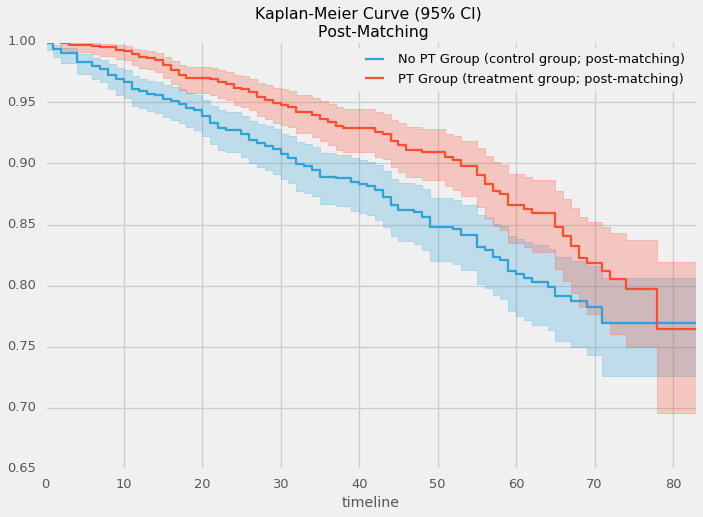

In [113]:
ax = kmfcontrolpost.plot()
kmftreatmentpost.plot(ax=ax)
#kmfcontrol.plot(ax=ax)
#kmftreatment.plot(ax=ax)
plt.title("Kaplan-Meier Curve (95% CI) \n Post-Matching");

#show(bokeh.mpl.to_bokeh())
#bokeh.plotting.show(bokeh.mpl.to_bokeh(xkcd=True));

## <font color='steelblue'>We can perform a rigorous test to see if the two survival curves truly have different DGPs</font>

It looks like PT is better at least out to 40 months.

In [114]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   t 0: -1
   df: 1
   null distribution: chi squared
   alpha: 0.95
   test: logrank

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00310 |              8.750 |      Reject Null    |        True       


In [115]:
control_age_dx = resgoodpop['agedx1'].loc[controlindices]
treatment_age_dx = resgoodpop['agedx1'].loc[treatmentindices]
dfage_comp = pd.DataFrame({'control_id': control_age_dx.index,
                          'control_age_dx': control_age_dx.values,
                          'treatment_id': treatment_age_dx.index,
                          'treatment_age_dx':treatment_age_dx.values })
dfage_comp['c_minus_t_age'] = dfage_comp.control_age_dx - dfage_comp.treatment_age_dx

In [116]:
import scipy.stats as stats
stats.ttest_ind(a=dfage_comp.control_age_dx.as_matrix(), 
               b=dfage_comp.treatment_age_dx.as_matrix(),
               equal_var=False)   # assume samples have equal variance?

Ttest_indResult(statistic=-0.49531404473855439, pvalue=0.62043136996209047)

In [117]:
stats.ttest_rel(a = dfage_comp.control_age_dx.as_matrix(),
                b = dfage_comp.treatment_age_dx.as_matrix())

Ttest_relResult(statistic=-1.8323621761725737, pvalue=0.067186063964383688)

In [118]:
apost = dftreeleague['agedx1'][treatmentindices]
bpost = dftreeleague['agedx1'][controlindices]


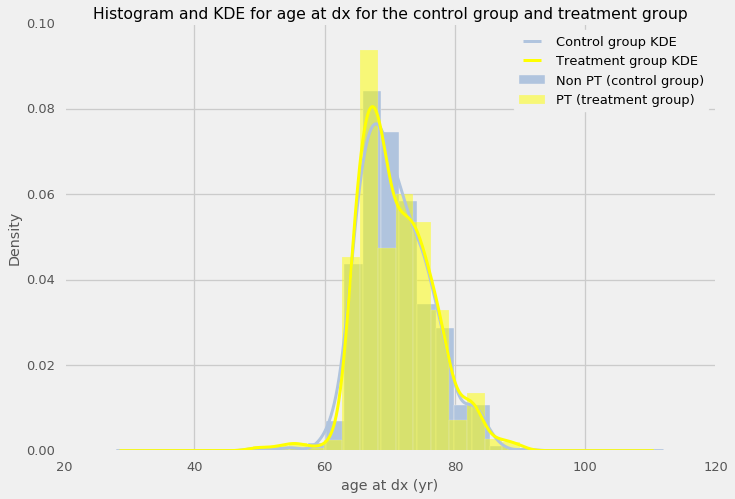

In [119]:
ax = bpost.plot(kind='hist',bins=15,color='LightSteelBlue',normed=True,label='Non PT (control group)')
bpost.plot(kind='kde',lw=3, color='LightSteelBlue', ax=ax, label='Control group KDE')
apost.hist(bins=15,color='yellow',normed=True,alpha=.5,ax=ax,label='PT (treatment group)')
apost.plot(kind='kde',lw=3, color='yellow', ax=ax, label='Treatment group KDE')
plt.title('Histogram and KDE for age at dx for the control group and treatment group')
plt.xlabel('age at dx (yr)')
plt.legend();

In [120]:
dfage_comp[['control_age_dx','treatment_age_dx']].describe()

control_age_dx  treatment_age_dx
count     1031.000000       1031.000000
mean        70.777886         70.898157
std          5.403176          5.620896
min         49.000000         49.000000
25%         67.000000         67.000000
50%         70.000000         70.000000
75%         74.000000         74.500000
max         91.000000         90.000000

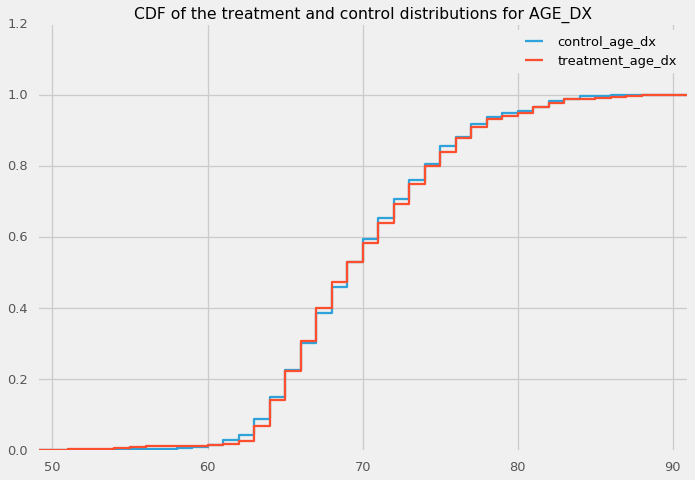

In [121]:
agedxtreatmentcdf = dfage_comp.treatment_age_dx.value_counts(normalize=True).sort_index().cumsum()
agedxcontrolcdf = dfage_comp.control_age_dx.value_counts(normalize=True).sort_index().cumsum()

dfagedx = pd.DataFrame(({'treatment_age_dx': agedxtreatmentcdf,
                        'control_age_dx': agedxcontrolcdf}))

dfagedx = dfagedx.fillna(method='ffill')

dfagedx.plot(drawstyle='steps',
            title='CDF of the treatment and control distributions for AGE_DX');

In [122]:
agedxresults = stats.ks_2samp(dfage_comp.treatment_age_dx.as_matrix(),
                             dfage_comp.control_age_dx.as_matrix())
print(agedxresults)

Ks_2sampResult(statistic=0.019398642095053348, pvalue=0.98950567510142062)


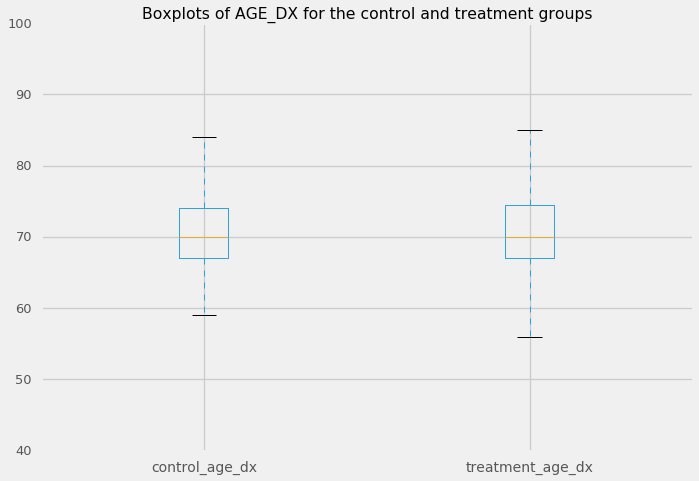

In [123]:
dfage_comp.boxplot(['control_age_dx','treatment_age_dx'],
                  return_type='axes');

plt.title('Boxplots of AGE_DX for the control and treatment groups');

In [124]:
len(controlindices)

1031

In [125]:
len(treatmentindices)

1031

## Pickle the control and treatment indices

In [126]:
import pickle
fileObject = open('control_indicies.pickle','wb')
pickle.dump(controlindices, fileObject)
fileObject.close()

In [127]:
import pickle
fileObject = open('treatment_indicies.pickle','wb')
pickle.dump(treatmentindices, fileObject)
fileObject.close()

In [128]:
control_yr_brth = resgoodpop['birthyr'].loc[controlindices]
treatment_yr_brth = resgoodpop['birthyr'].loc[treatmentindices]
dfyob_comp = pd.DataFrame({'control_id': control_yr_brth.index,
                          'control_yr_brth': control_yr_brth.values,
                          'treatment_id': treatment_yr_brth.index,
                          'treatment_yr_brth':treatment_yr_brth.values })
dfyob_comp['c_minus_t_yob'] = dfyob_comp.control_yr_brth - dfyob_comp.treatment_yr_brth


import scipy.stats as stats
stats.ttest_ind(a=dfyob_comp.control_yr_brth.as_matrix(), 
               b=dfyob_comp.treatment_yr_brth.as_matrix(),
               equal_var=False)   # assume samples have equal variance?

Ttest_indResult(statistic=0.45379330163101544, pvalue=0.65002547805826483)

In [129]:
stats.ttest_rel(a = dfyob_comp.control_yr_brth.as_matrix(),
                b = dfyob_comp.treatment_yr_brth.as_matrix())

Ttest_relResult(statistic=1.7223068284819796, pvalue=0.085314147777704727)

In [130]:
apost = dftreeleague['birthyr'][treatmentindices]
bpost = dftreeleague['birthyr'][controlindices]

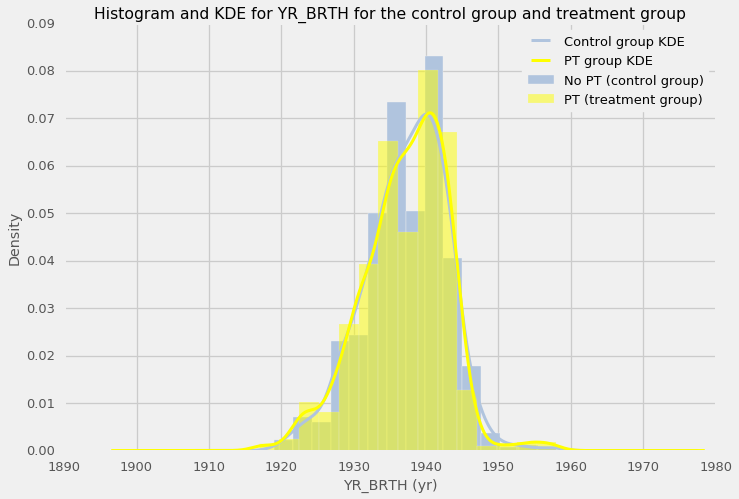

In [131]:
ax = bpost.hist(bins=15,color='LightSteelBlue',normed=True,label='No PT (control group)')
bpost.plot(kind='kde',lw=3, color='LightSteelBlue', ax=ax, label='Control group KDE')
apost.hist(bins=15,color='yellow',normed=True,alpha=.5,label='PT (treatment group)')
apost.plot(kind='kde',lw=3, color='yellow', ax=ax, label='PT group KDE')
plt.title('Histogram and KDE for YR_BRTH for the control group and treatment group')
plt.xlabel('YR_BRTH (yr)')
plt.legend();


In [132]:
yobtreatmentcdf = dfyob_comp.treatment_yr_brth.value_counts(normalize=True).sort_index().cumsum()
yobcontrolcdf = dfyob_comp.control_yr_brth.value_counts(normalize=True).sort_index().cumsum()

dfyob = pd.DataFrame(({'treatment_yr_brth': yobtreatmentcdf,
                        'control_yr_brth': yobcontrolcdf}))

dfyob = dfyob.fillna(method='ffill')

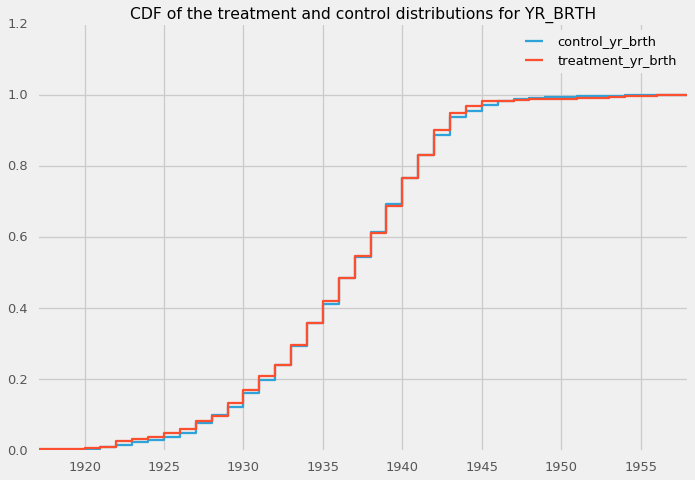

In [133]:
dfyob.plot(drawstyle='steps',
            title='CDF of the treatment and control distributions for YR_BRTH');

In [134]:
yobresults = stats.ks_2samp(dfyob_comp.treatment_yr_brth.as_matrix(),
                             dfyob_comp.control_yr_brth.as_matrix())
print(yobresults)

Ks_2sampResult(statistic=0.014548981571290032, pvalue=0.99989501994175778)


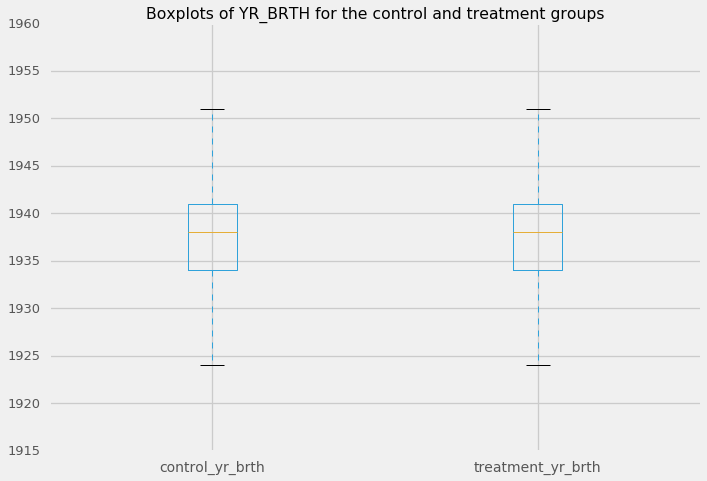

In [135]:
dfyob_comp.boxplot(['control_yr_brth','treatment_yr_brth'],
                  return_type='axes');

plt.title('Boxplots of YR_BRTH for the control and treatment groups');

In [136]:
control_yr_dx = resgoodpop['yrdx1'].loc[controlindices]
treatment_yr_dx = resgoodpop['yrdx1'].loc[treatmentindices]
dfyrdx_comp = pd.DataFrame({'control_id': control_yr_dx.index,
                          'control_yr_dx': control_yr_dx.values,
                          'treatment_id': treatment_yr_dx.index,
                          'treatment_yr_dx':treatment_yr_dx.values })
dfyrdx_comp['c_minus_t_yrdx'] = dfyrdx_comp.control_yr_dx - dfyrdx_comp.treatment_yr_dx


import scipy.stats as stats
stats.ttest_ind(a=dfyrdx_comp.control_yr_dx.as_matrix(), 
               b=dfyrdx_comp.treatment_yr_dx.as_matrix(),
               equal_var=False)   # assume samples have equal variance?

Ttest_indResult(statistic=-0.57359720824427052, pvalue=0.56630302260796439)

In [137]:
apost = dftreeleague['yrdx1'][treatmentindices]
bpost = dftreeleague['yrdx1'][controlindices]

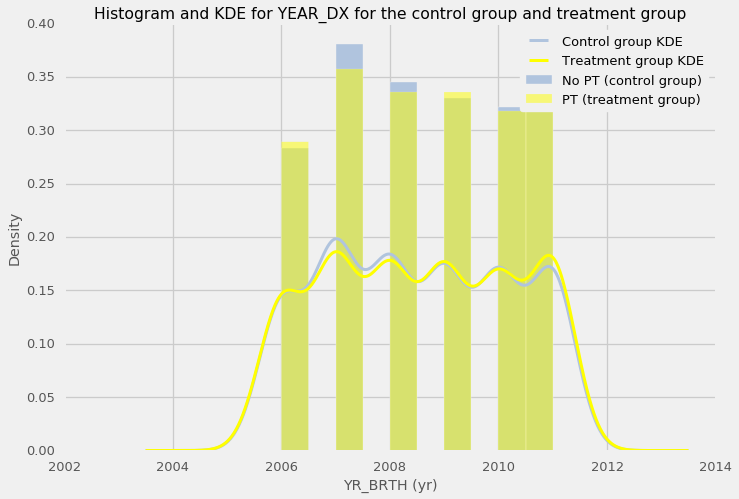

In [138]:
ax = bpost.hist(bins=10,color='LightSteelBlue',normed=True,label='No PT (control group)')
bpost.plot(kind='kde',lw=3, color='LightSteelBlue', ax=ax, label='Control group KDE')
apost.hist(bins=10,color='yellow',normed=True,alpha=.5,label='PT (treatment group)')
apost.plot(kind='kde',lw=3, color='yellow', ax=ax, label='Treatment group KDE')
plt.title('Histogram and KDE for YEAR_DX for the control group and treatment group')
plt.xlabel('YR_BRTH (yr)')
plt.legend();

In [139]:
yrdxtreatmentcdf = dfyrdx_comp.treatment_yr_dx.value_counts(normalize=True).sort_index().cumsum()
yrdxcontrolcdf = dfyrdx_comp.control_yr_dx.value_counts(normalize=True).sort_index().cumsum()

dfyrdx = pd.DataFrame(({'treatment_yr_dx': yrdxtreatmentcdf,
                        'control_yr_dx': yrdxcontrolcdf}))

dfyrdx = dfyrdx.fillna(method='ffill')

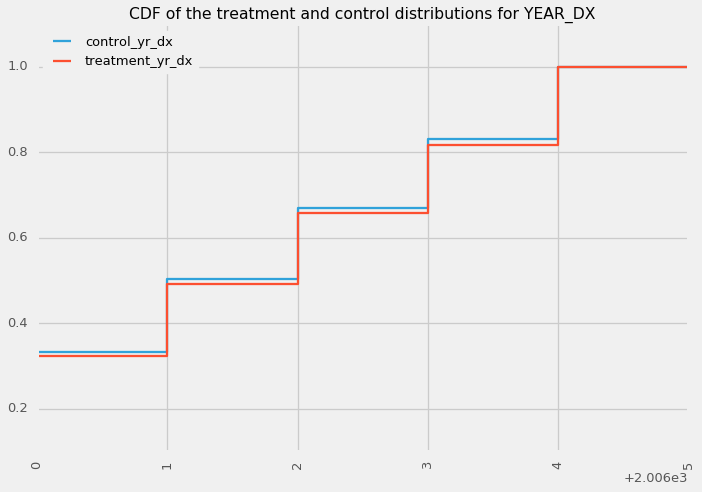

In [140]:
dfyrdx.plot(drawstyle='steps',
            title='CDF of the treatment and control distributions for YEAR_DX',rot=90);

In [141]:
yrdxresults = stats.ks_2samp(dfyrdx_comp.treatment_yr_dx.as_matrix(),
                             dfyrdx_comp.control_yr_dx.as_matrix())
print(yrdxresults)

Ks_2sampResult(statistic=0.013579049466537318, pvalue=0.99997849777671277)


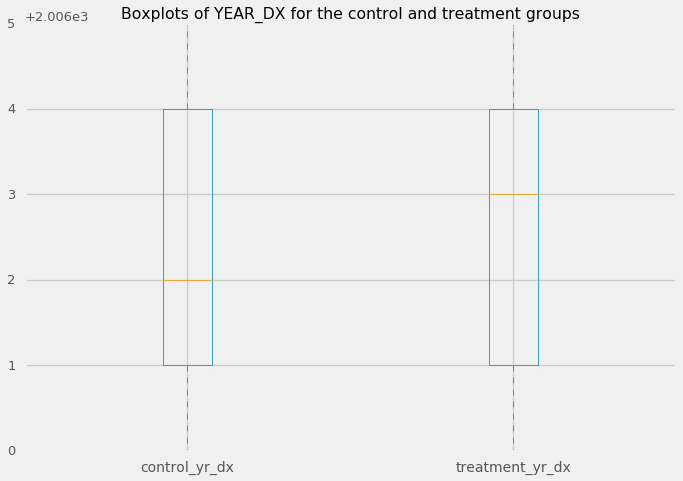

In [142]:
dfyrdx_comp.boxplot(['control_yr_dx','treatment_yr_dx'],
                  return_type='axes');

plt.title('Boxplots of YEAR_DX for the control and treatment groups');

In [143]:
control_lat = resgoodpop['lat_1'].loc[controlindices]
treatment_lat = resgoodpop['lat_1'].loc[treatmentindices]
dflat_comp = pd.DataFrame({'control_id': control_lat.index,
                          'control_lat': control_lat.values,
                          'treatment_id': treatment_lat.index,
                          'treatment_lat':treatment_lat.values })
dflat_comp['c_minus_t_lat'] = dflat_comp.control_lat - dflat_comp.treatment_lat


import scipy.stats as stats
stats.ttest_ind(a=dflat_comp.control_lat.as_matrix(), 
               b=dflat_comp.treatment_lat.as_matrix(),
               equal_var=False)   # assume samples have equal variance?

Ttest_indResult(statistic=0.037110643362098725, pvalue=0.97040038141071894)

In [144]:
stats.ttest_rel(a = dflat_comp.control_lat.as_matrix(),
                b = dflat_comp.treatment_lat.as_matrix())


Ttest_relResult(statistic=0.12039094002979585, pvalue=0.90419694733022626)

In [145]:
apost = dftreeleague['lat_1'][treatmentindices]
bpost = dftreeleague['lat_1'][controlindices]

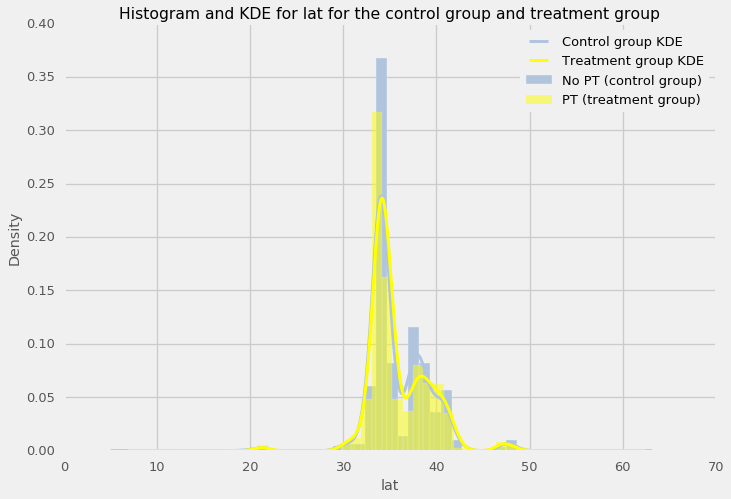

In [146]:
ax = bpost.hist(bins=25,color='LightSteelBlue',normed=True,label='No PT (control group)')
bpost.plot(kind='kde',lw=3, color='LightSteelBlue', ax=ax, label='Control group KDE')
apost.hist(bins=25,color='yellow',normed=True,alpha=.5,label='PT (treatment group)')
apost.plot(kind='kde',lw=3, color='yellow', ax=ax, label='Treatment group KDE')
plt.title('Histogram and KDE for lat for the control group and treatment group')
plt.xlabel('lat')
plt.legend();

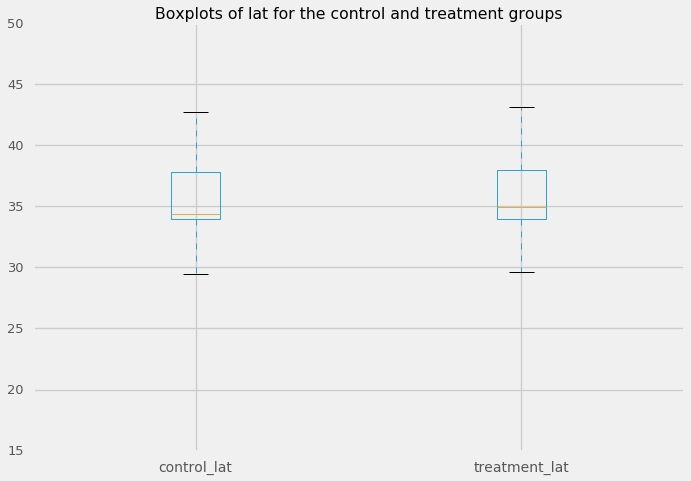

In [147]:
dflat_comp.boxplot(['control_lat','treatment_lat'],
                  return_type='axes');

plt.title('Boxplots of lat for the control and treatment groups');

In [148]:
df.head()

casereg  patient_id  casenumber       fivepct  \
0  Connecticut (1973+)  0205455031     5455031  Not included   
1  Connecticut (1973+)  0208413011     8413011  Not included   
2  Connecticut (1973+)  0208497001     8497001  Not included   
3  Connecticut (1973+)  0212443031    12443031  Not included   
4  Connecticut (1973+)  0212448031    12448031  Not included   

   medicaredateofdeath birthm  birthyr   m_sex   race state  \
0                  NaN    Aug     1950    Male  Black    09   
1            9222010.0    Jul     1958  Female  Black    09   
2            5102011.0    May     1945    Male  White    09   
3                  NaN    Dec     1954    Male  Asian    09   
4            1152011.0    Nov     1928    Male  White    09   

            ...                                        icdot09_1_description  \
0           ...            Malignant neoplasm of nasopharynx, unspecified...   
1           ...            Malignant neoplasm of nasopharynx, unspecified...   
2           ...            Malignant neoplasm of nasopharynx, unspecified...   
3           ...            Malignant neoplasm of nasopharynx, unspecified...   
4           ...            Malignant neoplasm of posterior wall of nasoph...   

  icdot09_2_description icdot09_3_description icdot09_4_description  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

  icdot09_5_description icdot09_6_description icdot09_7_description  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

  icdot09_8_description icdot09_9_description  icdot09_10_description  
0                   NaN                   NaN                     NaN  
1                   NaN                   NaN                     NaN  
2                   NaN                   NaN                     NaN  
3                   NaN                   NaN                     NaN  
4                   NaN                   NaN                     NaN  

[5 rows x 496 columns]

In [149]:
df = df.set_index('patient_id',drop=False)

In [150]:
df['grade1'][df['patient_id'].isin(treatmentindices)].value_counts()

Grade III; grade iii, grade 3; poorly differentiated; differentiated                                               510
Grade II; grade ii; grade 2; moderately differentiated; moderately differentiated; intermediate differentiation    435
cell type not determined, not stated or not applicable                                                              73
Grade IV; grade iv; grade 4; undifferentaited; anaplastic                                                            7
Grade I; grade i, grade 1; well differentiated; differentiated, NOS                                                  6
Name: grade1, dtype: int64

In [151]:
df['grade1'][df['patient_id'].isin(controlindices)].value_counts()

Grade III; grade iii, grade 3; poorly differentiated; differentiated                                               510
Grade II; grade ii; grade 2; moderately differentiated; moderately differentiated; intermediate differentiation    435
cell type not determined, not stated or not applicable                                                              73
Grade IV; grade iv; grade 4; undifferentaited; anaplastic                                                            7
Grade I; grade i, grade 1; well differentiated; differentiated, NOS                                                  6
Name: grade1, dtype: int64

In [152]:
df['srace'][df['patient_id'].isin(treatmentindices)].value_counts()

White                                                                                                                 937
Black                                                                                                                  46
Other Asian, including Asian, NOS and Oriental NOS                                                                     12
Chinese                                                                                                                 9
Filipino                                                                                                                8
Japanese                                                                                                                7
Korean                                                                                                                  6
Vietnamese                                                                                                              2
Polynesian, NOS         

In [153]:
df['srace'][df['patient_id'].isin(controlindices)].value_counts()

White                                                                                                                 937
Black                                                                                                                  46
Other Asian, including Asian, NOS and Oriental NOS                                                                     12
Chinese                                                                                                                 9
Filipino                                                                                                                8
Japanese                                                                                                                7
Korean                                                                                                                  6
Vietnamese                                                                                                              2
Polynesian, NOS         

In [154]:
#dfprostateorig['INSREC_PUB'].loc[treatmentindices].value_counts()
df['site1'][df['patient_id'].isin(treatmentindices)].value_counts()

Prostate gland               927
Choroid                       43
Upper lobe, lung              31
Lower lobe, lung               7
Frontal lobe                   5
Lower third of esophagus       3
Cerebral meninges              3
Parietal lobe                  2
Parotid gland                  2
Lung, NOS                      2
Middle third of esophagus      1
Ciliary body                   1
Acoustic nerve                 1
Temporal lobe                  1
Main bronchus                  1
Cervical esophagus             1
Name: site1, dtype: int64

In [155]:
df['site1'][df['patient_id'].isin(controlindices)].value_counts()

Prostate gland               927
Choroid                       43
Upper lobe, lung              31
Lower lobe, lung               7
Frontal lobe                   5
Lower third of esophagus       3
Cerebral meninges              3
Parietal lobe                  2
Parotid gland                  2
Lung, NOS                      2
Middle third of esophagus      1
Ciliary body                   1
Acoustic nerve                 1
Temporal lobe                  1
Main bronchus                  1
Cervical esophagus             1
Name: site1, dtype: int64

In [156]:
marstattreatment = df['marst1'][df['patient_id'].isin(treatmentindices)].value_counts()
marstatcontrol = df['marst1'][df['patient_id'].isin(controlindices)].value_counts()

print(marstattreatment)
print(marstatcontrol)

Married (including common law)    810
Divorced                           60
Single (never married)             60
Widowed                            52
Unknown                            42
Separated                           7
Name: marst1, dtype: int64
Married (including common law)    810
Divorced                           60
Single (never married)             60
Widowed                            52
Unknown                            42
Separated                           7
Name: marst1, dtype: int64


In [157]:
goodcols

['m_sex',
 'marst1',
 'srace',
 'nhiade',
 'grade1',
 'site1',
 'lat1',
 'histrec1',
 'modx1',
 'stat_rec',
 'birthyr',
 'agedx1',
 'yrdx1',
 'elevation_1',
 'lat_1']

In [158]:
goodcols_eval = ['m_sex','marst1','srace','nhiade','grade1','site1','lat1','lat_1','lng_1','histrec1',
            'modx1','birthyr','agedx1','yrdx1']

In [159]:
df[goodcols_eval].loc[[controlindices[0],treatmentindices[0]]]


m_sex                          marst1  srace  \
patient_id                                                
8835051335  Male  Married (including common law)  Black   
8893000334  Male  Married (including common law)  Black   

                                 nhiade  \
patient_id                                
8835051335  Non-Spanish-Hispanic-Latino   
8893000334  Non-Spanish-Hispanic-Latino   

                                                       grade1           site1  \
patient_id                                                                      
8835051335  Grade II; grade ii; grade 2; moderately differ...  Prostate gland   
8893000334  Grade II; grade ii; grade 2; moderately differ...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8835051335  Not a paired site  33.9533 -117.396   
8893000334  Not a paired site  34.9592 -116.419   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8835051335  8140-8398: adenomas and adenocarcinomas   Apr     1939      69   
8893000334  8140-8398: adenomas and adenocarcinomas   Apr     1939      69   

            yrdx1  
patient_id         
8835051335   2009  
8893000334   2009

In [160]:
df[goodcols_eval].loc[[controlindices[1],treatmentindices[1]]]

m_sex   marst1   srace                       nhiade  \
patient_id                                                       
8880063314  Male  Unknown  Korean  Non-Spanish-Hispanic-Latino   
8846014412  Male  Unknown  Korean  Non-Spanish-Hispanic-Latino   

                                                       grade1           site1  \
patient_id                                                                      
8880063314  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   
8846014412  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8880063314  Not a paired site  34.0522 -118.244   
8846014412  Not a paired site  33.9533 -117.396   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8880063314  8140-8398: adenomas and adenocarcinomas   Dec     1934      74   
8846014412  8140-8398: adenomas and adenocarcinomas   Dec     1937      73   

            yrdx1  
patient_id         
8880063314   2008  
8846014412   2010

In [161]:
df[goodcols_eval].loc[[controlindices[2],treatmentindices[2]]]

m_sex                          marst1  srace  \
patient_id                                                
8865006343  Male  Married (including common law)  White   
8804042392  Male  Married (including common law)  White   

                                 nhiade  \
patient_id                                
8865006343  Non-Spanish-Hispanic-Latino   
8804042392  Non-Spanish-Hispanic-Latino   

                                                       grade1           site1  \
patient_id                                                                      
8865006343  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   
8804042392  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8865006343  Not a paired site  34.0522 -118.244   
8804042392  Not a paired site  33.9533 -117.396   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8865006343  8140-8398: adenomas and adenocarcinomas   Jul     1923      84   
8804042392  8140-8398: adenomas and adenocarcinomas   Jul     1923      84   

            yrdx1  
patient_id         
8865006343   2007  
8804042392   2007

In [162]:
df[goodcols_eval].loc[[controlindices[3],treatmentindices[3]]]

m_sex                  marst1  srace                       nhiade  \
patient_id                                                                     
8833080450  Male  Single (never married)  White  Non-Spanish-Hispanic-Latino   
8848094355  Male  Single (never married)  White  Non-Spanish-Hispanic-Latino   

                                                       grade1           site1  \
patient_id                                                                      
8833080450  Grade II; grade ii; grade 2; moderately differ...  Prostate gland   
8848094355  Grade II; grade ii; grade 2; moderately differ...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8833080450  Not a paired site  35.4937  -118.86   
8848094355  Not a paired site  34.9592 -116.419   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8833080450  8140-8398: adenomas and adenocarcinomas   Jul     1935      74   
8848094355  8140-8398: adenomas and adenocarcinomas   Jul     1934      74   

            yrdx1  
patient_id         
8833080450   2010  
8848094355   2009

In [163]:
df[goodcols_eval].loc[[controlindices[4],treatmentindices[4]]]

m_sex                          marst1  srace   nhiade  \
patient_id                                                         
8887079350  Male  Married (including common law)  White  Mexican   
8862072311  Male  Married (including common law)  White  Mexican   

                                                       grade1           site1  \
patient_id                                                                      
8887079350  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   
8862072311  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8887079350  Not a paired site  34.0522 -118.244   
8862072311  Not a paired site  33.9533 -117.396   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8887079350  8140-8398: adenomas and adenocarcinomas   Jun     1941      65   
8862072311  8140-8398: adenomas and adenocarcinomas   Jun     1941      65   

            yrdx1  
patient_id         
8887079350   2006  
8862072311   2007

In [164]:
df[goodcols_eval].loc[[controlindices[5],treatmentindices[5]]]

m_sex                          marst1  srace  \
patient_id                                                
8855021414  Male  Married (including common law)  White   
8818042156  Male  Married (including common law)  White   

                                 nhiade  \
patient_id                                
8855021414  Non-Spanish-Hispanic-Latino   
8818042156  Non-Spanish-Hispanic-Latino   

                                                       grade1           site1  \
patient_id                                                                      
8855021414  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   
8818042156  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8855021414  Not a paired site  33.7175 -117.831   
8818042156  Not a paired site  33.7175 -117.831   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8855021414  8140-8398: adenomas and adenocarcinomas   Apr     1933      77   
8818042156  8140-8398: adenomas and adenocarcinomas   Apr     1933      77   

            yrdx1  
patient_id         
8855021414   2011  
8818042156   2011

In [165]:
df[goodcols_eval].loc[[controlindices[6],treatmentindices[6]]]

m_sex                          marst1  srace  \
patient_id                                                
8834065023  Male  Married (including common law)  White   
8816015314  Male  Married (including common law)  White   

                                 nhiade  \
patient_id                                
8834065023  Non-Spanish-Hispanic-Latino   
8816015314  Non-Spanish-Hispanic-Latino   

                                                       grade1           site1  \
patient_id                                                                      
8834065023  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   
8816015314  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8834065023  Not a paired site  37.9176 -121.171   
8816015314  Not a paired site   38.196 -120.681   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8834065023  8140-8398: adenomas and adenocarcinomas   Oct     1935      73   
8816015314  8140-8398: adenomas and adenocarcinomas   Oct     1935      73   

            yrdx1  
patient_id         
8834065023   2008  
8816015314   2008

In [166]:
df[goodcols_eval].loc[[controlindices[7],treatmentindices[7]]]

m_sex    marst1  srace                       nhiade  \
patient_id                                                       
8876047420  Male  Divorced  White  Non-Spanish-Hispanic-Latino   
8820017411  Male  Divorced  White  Non-Spanish-Hispanic-Latino   

                                                       grade1           site1  \
patient_id                                                                      
8876047420  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   
8820017411  Grade III; grade iii, grade 3; poorly differen...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8876047420  Not a paired site  37.3337 -121.891   
8820017411  Not a paired site  40.7909 -121.847   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8876047420  8140-8398: adenomas and adenocarcinomas   Jan     1928      81   
8820017411  8140-8398: adenomas and adenocarcinomas   Jan     1930      79   

            yrdx1  
patient_id         
8876047420   2010  
8820017411   2010

In [167]:
df[goodcols_eval].loc[[controlindices[8],treatmentindices[8]]]

m_sex                          marst1  srace  \
patient_id                                                
8840048462  Male  Married (including common law)  White   
8882013432  Male  Married (including common law)  White   

                                 nhiade  \
patient_id                                
8840048462  Non-Spanish-Hispanic-Latino   
8882013432  Non-Spanish-Hispanic-Latino   

                                                       grade1           site1  \
patient_id                                                                      
8840048462  Grade II; grade ii; grade 2; moderately differ...  Prostate gland   
8882013432  Grade II; grade ii; grade 2; moderately differ...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8840048462  Not a paired site  32.7157 -117.161   
8882013432  Not a paired site  34.0522 -118.244   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8840048462  8140-8398: adenomas and adenocarcinomas   Jul     1928      83   
8882013432  8140-8398: adenomas and adenocarcinomas   Jul     1930      80   

            yrdx1  
patient_id         
8840048462   2011  
8882013432   2011

In [168]:
df[goodcols_eval].loc[[controlindices[9],treatmentindices[9]]]

m_sex                          marst1  srace  \
patient_id                                                
8874062373  Male  Married (including common law)  White   
8813092335  Male  Married (including common law)  White   

                                 nhiade  \
patient_id                                
8874062373  Non-Spanish-Hispanic-Latino   
8813092335  Non-Spanish-Hispanic-Latino   

                                                       grade1           site1  \
patient_id                                                                      
8874062373  Grade II; grade ii; grade 2; moderately differ...  Prostate gland   
8813092335  Grade II; grade ii; grade 2; moderately differ...  Prostate gland   

                         lat1    lat_1    lng_1  \
patient_id                                        
8874062373  Not a paired site  37.3337 -121.891   
8813092335  Not a paired site  37.2519 -119.696   

                                           histrec1 modx1  birthyr  agedx1  \
patient_id                                                                   
8874062373  8140-8398: adenomas and adenocarcinomas   Apr     1943      64   
8813092335  8140-8398: adenomas and adenocarcinomas   Apr     1943      65   

            yrdx1  
patient_id         
8874062373   2008  
8813092335   2008

Let's plot the lat_1, lng_1 coordinates of the treatment and control groups separately on a google map.
The treatment group points should cluster around the Proton Treatment Centers, and, because of the matching, so should the 
control group points.

Follow the procedure outlined in:

### Mastering Social Media Mining with Python

Google Maps (https://www.google.com/maps) is a service so popular that it probably doesn't need much introduction. Among its many features, it offers the possibility of creating a custom map with a list of points of interests.

One way to automate the creation of maps, and guarantee interoperability between different applications, is to employ a common format to share coordinates. In this section, we will discuss the use of Keyhole Markup Language (KML) (https://en.wikipedia.org/wiki/Keyhole_Markup_Language) as a way to export data in a format that is recognized by Google Maps. The KML format is an XML notation to express geographical data in two- and three-dimensional maps. Originally developed for Google Earth, another Google product, it's now used for a variety of applications.

the KML markup uses longitude,latitude,altitude-with altitude being optional, and assumed to be zero if omitted as shown in the preceding example.

In order to visualize a list of geographic coordinates on Google Maps, our intermediate task is to produce such lists in the KML format. In Python, there's a library called PyKML that simplifies the process.

Forget about pykml. Just use Basemap and do it all in python.

http://chrisalbon.com/python/matplotlib_plot_points_on_map.html

In [174]:
dgt = df[goodcols_eval].loc[treatmentindices].copy()

In [175]:
dgc = df[goodcols_eval].loc[controlindices].copy()

In [176]:
from mpl_toolkits.basemap import Basemap

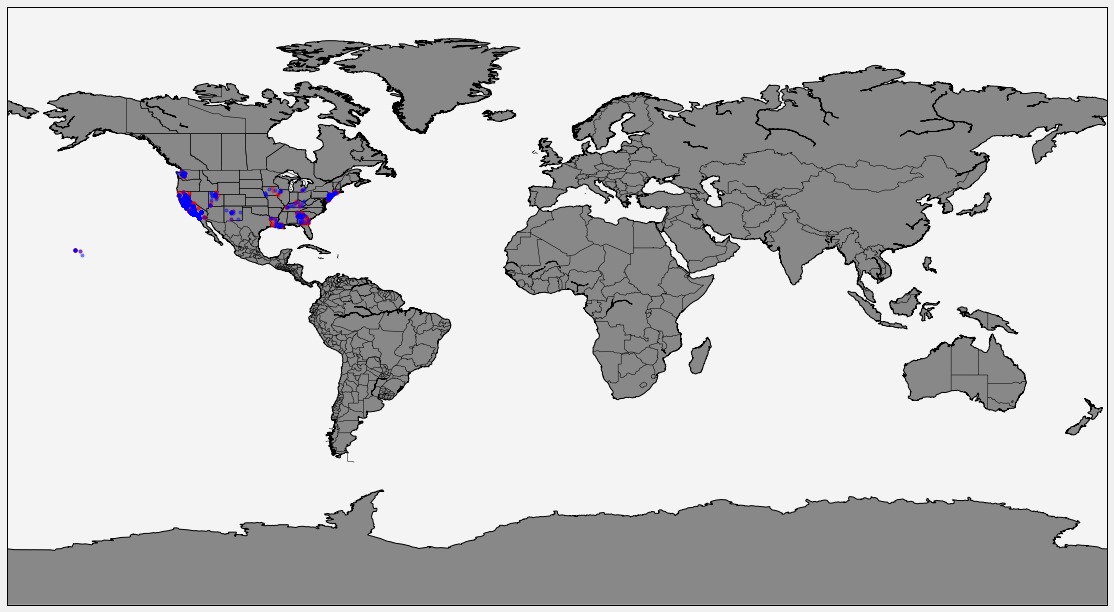

In [184]:
# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

map.drawstates()

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(dgt['lng_1'].values, dgt['lat_1'].values)
xc, yc = map(dgc['lng_1'].values, dgc['lat_1'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=4,alpha=.5)
map.plot(xc,yc, 'bo', markersize=4,alpha=.5)

# Show the map
plt.show()

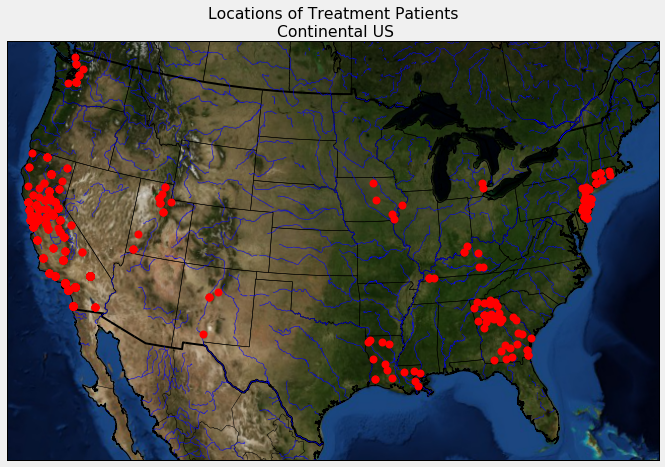

In [194]:
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)

m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
m.bluemarble()

# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
#m.fillcontinents(color='coral',lake_color='aqua')

m.drawrivers(color='#0000ff')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = m(dgt['lng_1'].values, dgt['lat_1'].values)
xc, yc = m(dgc['lng_1'].values, dgc['lat_1'].values)

# Plot them using round markers of size 6
m.plot(x, y, 'ro', markersize=8,alpha=1)
#m.plot(xc,yc, 'bo', markersize=4,alpha=.5)

plt.title("Locations of Treatment Patients\n Continental US")
plt.show()

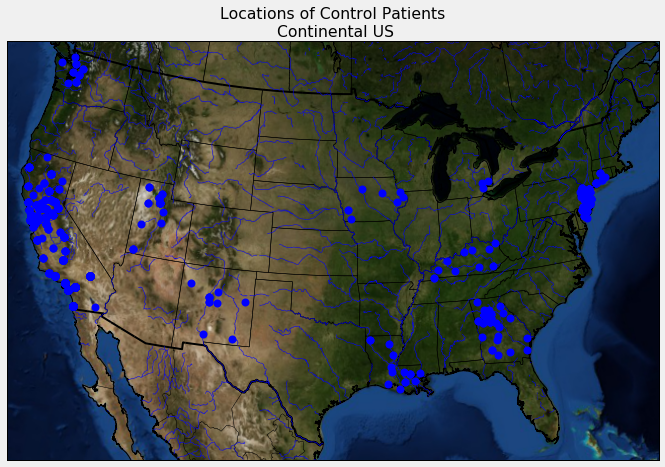

In [196]:
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)

m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
m.bluemarble()

# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
#m.fillcontinents(color='coral',lake_color='aqua')

m.drawrivers(color='#0000ff')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = m(dgt['lng_1'].values, dgt['lat_1'].values)
xc, yc = m(dgc['lng_1'].values, dgc['lat_1'].values)

# Plot them using round markers of size 6
#m.plot(x, y, 'ro', markersize=8,alpha=1)
m.plot(xc,yc, 'bo', markersize=8,alpha=1)

plt.title("Locations of Control Patients\n Continental US")
plt.show()

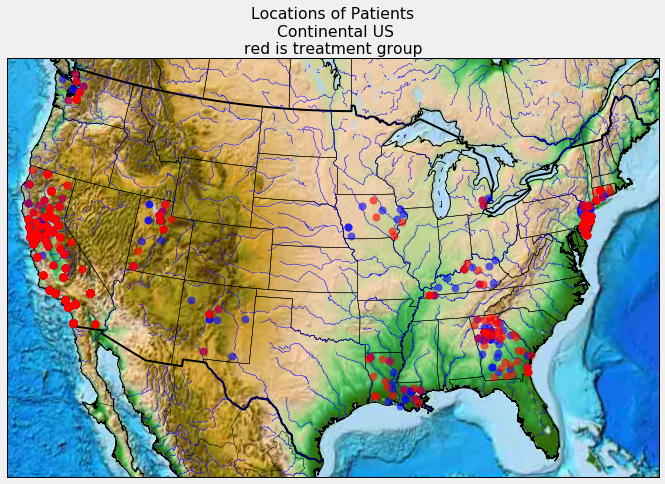

In [200]:
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)

m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
#m.bluemarble()
m.etopo()

# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
#m.fillcontinents(color='coral',lake_color='aqua')

m.drawrivers(color='#0000ff')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = m(dgt['lng_1'].values, dgt['lat_1'].values)
xc, yc = m(dgc['lng_1'].values, dgc['lat_1'].values)

# Plot them using round markers of size 6
#m.plot(x, y, 'ro', markersize=8,alpha=.7)
m.plot(xc,yc, 'bo', markersize=8,alpha=.6)
m.plot(x, y, 'ro', markersize=8,alpha=.6)

plt.title("Locations of Patients\n Continental US\nred is treatment group")
plt.show()

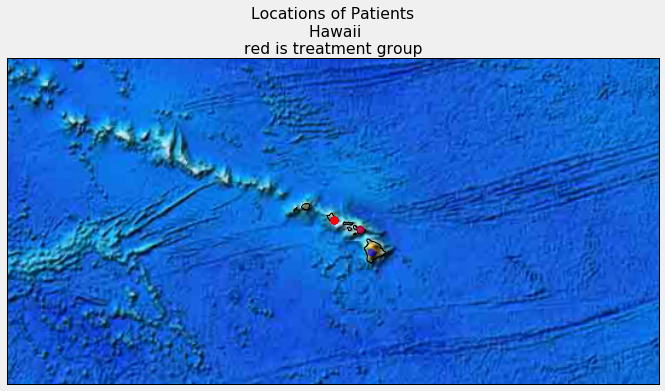

In [215]:
# Lambert Conformal map of USA lower 48 states
m = Basemap(width=4000000,height=2000000,projection='lcc', lat_1=17, lat_2=26,lat_0=21.28,
  lon_0=-157.91, resolution='h', area_thresh=10)

m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
#m.bluemarble()
m.etopo()

# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
#m.fillcontinents(color='coral',lake_color='aqua')

m.drawrivers(color='#0000ff')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = m(dgt['lng_1'].values, dgt['lat_1'].values)
xc, yc = m(dgc['lng_1'].values, dgc['lat_1'].values)

# Plot them using round markers of size 6
#m.plot(x, y, 'ro', markersize=8,alpha=.7)
m.plot(xc,yc, 'bo', markersize=8,alpha=.6)
m.plot(x, y, 'ro', markersize=8,alpha=.6)

plt.title("Locations of Patients\n Hawaii\nred is treatment group")
plt.show()

Now get the coordinates of the proton therapy centers in the US

These maps illustate that their is **demand** for proton therapy; patients willing to travel and/or move to get PT treatment.

## We can check this for the prostate patients; see which ones develop genito-urinary complications (comparing treatment and control groups)

In prostate cancer cases, the issue is less clear. Some published studies found a reduction in long term rectal and genito-urinary damage when treating with protons rather than photons (meaning X-ray or gamma ray therapy). Others showed a small difference, limited to cases where the prostate is particularly close to certain anatomical structures.[18][19] The relatively small improvement found may be the result of inconsistent patient set-up and internal organ movement during treatment, which offsets most of the advantage of increased precision.[19][20][20][21] One source suggests that dose errors around 20% can result from motion errors of just 2.5 mm,[citation needed] and another that prostate motion is between 5–10 mm.[22]

The issue of when, whether, and how best to apply this technology is controversial.[28][29][30] As of 2012 there have been no controlled trials to demonstrate that proton therapy yields improved survival or other clinical outcomes (including impotence in prostate cancer) compared to other types of radiation therapy, although a five-year study of prostate cancer is underway at Massachusetts General Hospital.[31][32][33][34][34] Proton therapy is far more expensive than conventional therapy.[29][35] As of 2012 proton therapy required a very large capital investment (from US$100M to more than $180M).[28][30][36]

Preliminary results from a 2009 study, including high-dose treatments, showed very few side effects.[37]
http://jacksonville.com/business/2009-11-23/story/uf_proton_therapy_institute_study_shows_positive_outcomes#

NHS Choices has stated:

We cannot say with any conviction that proton beam therapy is “better” overall than radiotherapy. (...) Some overseas clinics providing proton beam therapy heavily market their services to parents who are understandably desperate to get treatment for their children. Proton beam therapy can be very costly and it is not clear whether all children treated privately abroad are treated appropriately.[38][39]

Historically, proton therapy has been expensive. Goitein & Jermann's[42] analysis had previously determined the relative cost of proton therapy is approximately 2.4 times that of X-ray therapies. However, newer, more compact proton beam sources can be four to five times cheaper and offer more accurate three-dimensional targeting.[43][44] Thus the cost is expected to reduce as better proton technology becomes more widely available. A similar analysis by Lievens & Van den Bogaert[45] determined that the cost of proton therapy is not unrealistic and should not be the reason for denying patients access to this technology. In some clinical situations, proton beam therapy is clearly superior to the alternatives.[46][47] Another study in 2007 expressed concerns about the effectiveness of proton therapy for treating prostate cancer.[48] Although, with the advent of new developments in proton beam technology, such as improved scanning techniques and more precise dose delivery ('pencil beam scanning'), this situation may change considerably.[49] Amitabh Chandra, a health economist at Harvard University, has been quoted as saying that "Proton-beam therapy is like the death star of American medical technology... It's a metaphor for all the problems we have in American medicine.”[50] However, another study has shown that proton therapy in fact brings cost savings.[51] The advent of second generation, and much less expensive, proton therapy equipment now being installed at various sites may change this picture significantly.[52]

As of January 2016, there are 58 particle therapy facilities worldwide. This represents a total of more than 121 treatment rooms available to patients.[53] More than 96,537 patients had been treated.[54]

One hindrance to universal use of the proton in cancer treatment is the size and cost of the cyclotron or synchrotron equipment necessary. Several industrial teams are working on development of comparatively small accelerator systems to deliver the proton therapy to patients.[55] Among the technologies being investigated are superconducting synchrocyclotrons (also known as FM Cyclotrons), ultra-compact synchrotrons, dielectric wall accelerators,[55] and linear particle accelerators.[44]

In [216]:
dfprotontables = pd.read_html('https://en.wikipedia.org/wiki/Proton_therapy')

In [217]:
len(dfprotontables)

6

In [219]:
dfproton = dfprotontables[0]
dfproton

0  \
0                                         Institution   
1   University of California, Davis, Crocker Nucle...   
2            Loma Linda University Medical Center[58]   
3   Francis H. Burr Proton Center (formerly NPTC) ...   
4   SCCA Proton Therapy Center at Seattle Cancer C...   
5     Indiana University Health Proton Therapy Center   
6   University of Florida Health Proton Therapy In...   
7   University of Texas MD Anderson Cancer Center[60]   
8           INTEGRIS Cancer Institute of Oklahoma[61]   
9                               CDH Proton Center[62]   
10  Roberts Proton Therapy Center, University of P...   
11        Hampton University Proton Therapy Institute   
12                  ProCure Proton Therapy Center[64]   
13                          Siteman Cancer Center[43]   
14                Provision Proton Therapy Center[67]   
15  Scripps Health Scripps Proton Therapy Center [68]   
16                             Ackerman Cancer Center   
17  The Laurie Proton Therapy Center, Robert Wood ...   
18                    Texas Center for Proton Therapy   
19                          Mayo Clinic Cancer Center   
20                      Mayo Clinic Jacobson Building   
21  The Marjorie and Leonard Williams Center for P...   
22  The Baptist Health of South Florida Miami Canc...   

                           1                        2  \
0                   Location  Year of first treatment   
1                  Davis, CA                     1994   
2             Loma Linda, CA                     1990   
3                 Boston, MA                     2001   
4                Seattle, WA                     2001   
5            Bloomington, IN                     2004   
6           Jacksonville, FL                     2006   
7                Houston, TX                     2006   
8          Oklahoma City, OK                     2009   
9            Warrenville, IL                     2010   
10          Philadelphia, PA                     2010   
11               Hampton, VA                     2010   
12              Somerset, NJ                     2012   
13             St. Louis, MO                     2013   
14             Knoxville, TN                     2014   
15             San Diego, CA                     2014   
16          Jacksonville, FL                     2015   
17         New Brunswick, NJ                     2015   
18  Dallas Fort Worth, Texas                     2015   
19          Phoenix, Arizona                     2016   
20             Rochester, MN                     2016   
21          Orlando, Florida                     2016   
22            Miami, Florida                     2017   

                                                    3  
0                                            Comments  
1     Ocular treatments only (low energy accelerator)  
2   First hospital-based facility in USA It uses t...  
3   Continuation of Harvard Cyclotron Laboratory/M...  
4      Part of Fred Hutchinson Cancer Research Center  
5               Formerly MPRI (Closed 4December 2014)  
6   The UF Health Proton Therapy Institute is a pa...  
7                                                 NaN  
8     First of a number of planned ProCure facilities  
9    Second of a number of planned ProCure facilities  
10  The largest proton therapy center in the world...  
11                                                NaN  
12    Third of a number of planned ProCure facilities  
13  First of the new single suite, ultra-compact,s...  
14                                                NaN  
15  (5 suites, all using pencil-beam scanning prec...  
16  Ackerman Cancer Center is the world's first pr...  
17  The Laurie Proton Therapy Center is home to th...  
18  TCPT is a joint venture between Baylor, McKess...  
19  4 treatment rooms, Mayo Clinic Cancer Center O...  
20  4 treatment rooms, [2], officially opened its ...  
21  http://www.ufhealthcancerorlando.com/centers/p...  
22  https://baptisthealth.

In [220]:
dfproton[1]

0                     Location
1                    Davis, CA
2               Loma Linda, CA
3                   Boston, MA
4                  Seattle, WA
5              Bloomington, IN
6             Jacksonville, FL
7                  Houston, TX
8            Oklahoma City, OK
9              Warrenville, IL
10            Philadelphia, PA
11                 Hampton, VA
12                Somerset, NJ
13               St. Louis, MO
14               Knoxville, TN
15               San Diego, CA
16            Jacksonville, FL
17           New Brunswick, NJ
18    Dallas Fort Worth, Texas
19            Phoenix, Arizona
20               Rochester, MN
21            Orlando, Florida
22              Miami, Florida
Name: 1, dtype: object

In [221]:
# make a list of lat lons correspoding to the above locations

In [231]:
centers_dict = {'Davis, CA': [38.5568118,-121.7700491],
               'Loma Linda, CA': [34.0428589,-117.2838294],
               'Boston, MA': [42.3132878,-71.1975851],
               'Seattle, WA': [47.6147624,-122.4763332],
               'Bloomington, IN': [39.1711919,-86.602058],
               'Jacksonville, FL': [30.3446899,-82.0013407],
               'Houston, TX': [29.8168809,-95.6821725],
               'Oklahoma City, OK': [35.4823226,-97.7600756],
               'Warrenvlile, IL': [41.8247102,-88.2168148],
               'Philadelphia, PA': [40.004668,-75.2584614],
               'Hampton, VA': [37.0403431,-76.4311508],
               'Somerset, NJ': [40.5012296,-74.507752],
               'St. Louis, MO': [38.6530166,-90.3838907],
               'Knoxville, TN': [35.9583816,-84.0655115],
               'San Diego, CA': [32.8242389,-117.3760429],
               'Jacksonville, FL': [30.3446899,-82.0013407],
               'New Brunswick, NJ': [40.4882392,-74.4763898],
               'Dallas Fort Worth, TX': [32.7724978,-97.2485344],
               'Phoenix, AZ': [33.6050976,-112.4059302],
               'Rochester, MN': [43.9959015,-92.6216003],
               'Orlando, FL': [28.4810968,-81.5091799],
               'Miami, FL': [25.7823071,-80.3012157]}

In [232]:
center_lats = [l[0] for l in centers_dict.values()]
print(center_lats)
center_lngs = [l[1] for l in centers_dict.values()]
print(center_lngs)

[40.4882392, 29.8168809, 41.8247102, 30.3446899, 37.0403431, 35.9583816, 35.4823226, 47.6147624, 34.0428589, 32.8242389, 39.1711919, 28.4810968, 38.5568118, 42.3132878, 40.5012296, 32.7724978, 33.6050976, 40.004668, 38.6530166, 25.7823071, 43.9959015]
[-74.4763898, -95.6821725, -88.2168148, -82.0013407, -76.4311508, -84.0655115, -97.7600756, -122.4763332, -117.2838294, -117.3760429, -86.602058, -81.5091799, -121.7700491, -71.1975851, -74.507752, -97.2485344, -112.4059302, -75.2584614, -90.3838907, -80.3012157, -92.6216003]


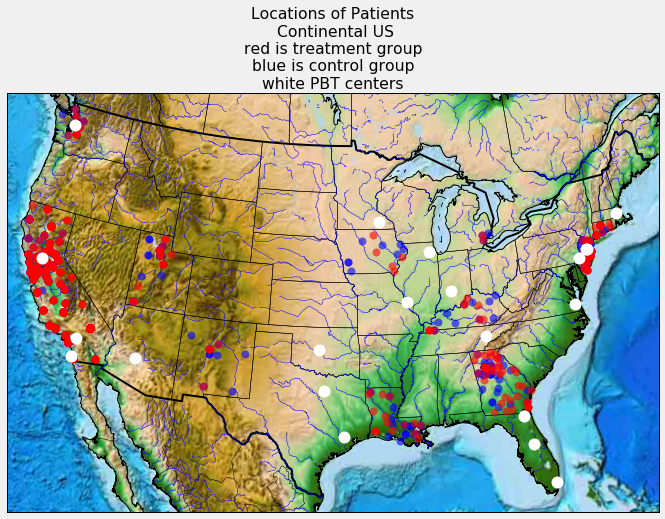

In [239]:
# Lambert Conformal map of USA lower 48 states
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)

m.drawcoastlines()
# draw country boundaries
m.drawcountries(linewidth=2)
# draw states boundaries (America only)
m.drawstates()
#m.bluemarble()
m.etopo()

# fill the background (the oceans)
m.drawmapboundary(fill_color='aqua')
# fill the continental area
# we color the lakes like the oceans
#m.fillcontinents(color='coral',lake_color='aqua')

m.drawrivers(color='#0000ff')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = m(dgt['lng_1'].values, dgt['lat_1'].values)
xc, yc = m(dgc['lng_1'].values, dgc['lat_1'].values)
xcenters, ycenters = m(center_lngs, center_lats)

# Plot them using round markers of size 6
#m.plot(x, y, 'ro', markersize=8,alpha=.7)
m.plot(xc,yc, 'bo', markersize=8,alpha=.6)
m.plot(x, y, 'ro', markersize=8,alpha=.6)
m.plot(xcenters, ycenters, 'wo', markersize=12)

plt.title("Locations of Patients\n Continental US\nred is treatment group\nblue is control group\nwhite "+\
         "PBT centers")

plt.savefig('map_with_centers.pdf', format='pdf')
#plt.show()

In [229]:
dgc['lng_1'].values

array([-117.3961192, -118.2436596, -118.2436596, ..., -74.6868815,
       -74.2883536, -117.8311428], dtype=object)